<a href="https://colab.research.google.com/github/ruixuanz/EECS-598/blob/master/EECS_598.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
   trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
   testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

In [ ]:
x, y = data[0][0], data[1][0]
print(y)
print(int(y))
print(x)

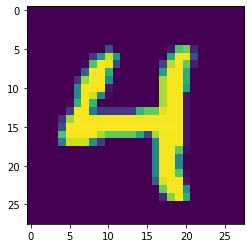

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28)) 

In [ ]:
type(trainset)

torch.utils.data.dataloader.DataLoader

In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):              
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

        # pytorch allows to manipulate and build neural network as our wish i.e.
        
        # if weather = sunny:
        #   x = F.relu(self.fc1(x))
        #   x = F.relu(self.fc2(x))
        #   x = F.relu(self.fc3(x))
        #   x = F.relu(self.fc4(x))
        #   return F.log_softmax(x, dim=1)
        
        # else:
        #   ...

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
x = torch.rand(28,28)
output = net(x.view(1,28*28))
output

tensor([[-1.2710e+01, -2.2715e+01, -2.0596e+01, -1.6992e+01, -2.4032e+01,
         -4.6803e-04, -7.6749e+00, -1.5275e+01, -1.5026e+01, -2.0091e+01]],
       grad_fn=<LogSoftmaxBackward>)

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001) # decaying learning rate
Epochs = 3
for epoch in range(Epochs):
  for data in trainset:
    x, y = data
    net.zero_grad()
    output = net(x.view(10,28*28)) # batch = 10
    loss = F.nll_loss(output,y) 
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0015, grad_fn=<NllLossBackward>)
tensor(0.0171, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    x, y = data
    output = net(x.view(-1,28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.984


In [ ]:
y

tensor([3, 2, 2, 9, 1, 3, 4, 5, 7, 0])

Symbol result: 
tensor(3)


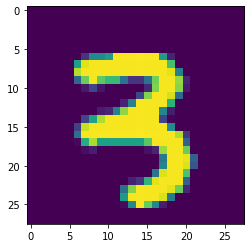

In [ ]:
plt.imshow(x[0].view(28,28))
print("Symbol result: ")
print(torch.argmax(net(x[0].view(1,28*28))))

In [50]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import zipfile

In [51]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-09-04 02:22:18--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.44.0.79, 2600:1417:3f:898::e59, 2600:1417:3f:8a0::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.44.0.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  34.4MB/s    in 25s     

2020-09-04 02:22:44 (31.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [55]:
REBUILD_DATA = True

class DogsVSCats():
  IMG_SIZE = 50
  CATS = "/tmp/PetImages/Cat"
  DOGS = "/tmp/PetImages/Dog"
  LABELS = {CATS:0, DOGS:1}
  training_data = []
  catcount = 0
  dogcount = 0

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

          if label == self.CATS:
            self.catcount += 1
          elif label == self.DOGS:
            self.dogcount += 1

        except Exception as e:
          pass

    np.random.shuffle(self.training_data)
    np.save("training_data.npy", self.training_data)
    print("Cats: ",self.catcount)
    print("Dogs: ",self.dogcount)


if REBUILD_DATA:
  dogsvcats = DogsVSCats()
  dogsvcats.make_training_data()



  0%|          | 61/12501 [00:00<00:20, 607.44it/s]

/tmp/PetImages/Cat


  1%|          | 97/12501 [00:00<00:12, 966.84it/s]

/tmp/PetImages/Dog


100%|██████████| 12501/12501 [00:13<00:00, 958.07it/s]


Cats:  12476
Dogs:  12470


In [ ]:
training_data = np.load("training_data.npy")